<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

# Parte I. Regresión

In [1]:
#Para esta actividad se importarán las siguientes librerías:
#Para esta actividad se importarán las siguientes librerías:
import tensorflow as tf
from tensorflow import keras
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential, layers, models

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [2]:
#Código para cargar el Dataset
url = "https://raw.githubusercontent.com/Jona-24/Act2_TecnicasIA/refs/heads/main/data/Student_Performance.csv"
df = pd.read_csv(url, sep=",")
df.head()



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

El data set representa un proceso de desempeño de los estudiantes de un curso educativo, en el se muestran como variables independientes las características de los estudiantes y como variable dependiente la calificación final obtenida por cada estudiante en el curso.
La fuente de este data set es kaggle: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

## Explique el problema a resolver. 
#### Descripción del problema. <br>
Se busca predecir de manera confiable a traves del uso de algoritmo de ML y redes neuronales el desempeño de los estudiantes del curso seleccionado a traves de sus condiciones de estudio y evaluar si condiciones como estudiar mas, dormir mejor o tomar mas examenes de prueba afecta positivamente su desempeño final o no. <br>
#### Tipo de problema (justifique) <br>
 Es un problema de regresion, que hace parte de los algoritmos supervisados, en estos no se busca predecir una clase, se busca realmente predecir un valor real, que en este caso representa el puntaje obtenido <br>
#### Variable objetivo: Performance Index (Desempeño del estudiante)<br>
#### Variables de entrada: Hours Studied,Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced<br>
#### Utilidad de su posible solución: <br>
Permite concluir que variables afectan mas el desempeño de los estudiantes con el fin de propiciar las mejores condiciones posibles para que un estudiante rinda fecientemente en distintos tipos de cursos.<br>
#### Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos): <br>
Considero importante comprobar en especifico el impacto o peso que tienen las variables horas de estudio y horas de sueño ya que son variables que considero extrapolables a cualquier tipo de actividad de aprendizaje<br>

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total. : 10000
>- Número de atributos de entrada, su significado y tipo.
Hours Studied	int64: Horas que un estudiante dedica a estudiar
Previous Scores	int64: Calificaciones previas del estudiante (0-100)
Extracurricular Activities	object: Indica si el estudiante realiza actividades extracurriculares
Sleep Hours	int64: Horas de sueño del estudiante
Sample Question Papers Practiced	int64: Cuantos examenes de prueba realiza el estudiante
>- Estadísticas de la variable objetivo.
Estadísticas de la variable objetivo 'Performance Index':
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000

>- Estadísticas de los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [3]:
#Código que responde a la descripción anterior

#Número de instancias en total.
df.shape[0]  # Número de filas
print("Número de instancias en total:", df.shape[0])

#Número de atributos en total 
atributos = df.drop(columns=["Performance Index"])

info_atributos = pd.DataFrame({
    "tipo": atributos.dtypes,
    "valores_nulos": atributos.isna().sum(),
    "valores_unicos": atributos.nunique()
})
print("Número de atributos en total:", atributos.shape[1])
print(info_atributos)   

#Estadisticas de la variable objetivo "Performance Index"
estadisticas_performance = df["Performance Index"].describe()  
print("Estadísticas de la variable objetivo 'Performance Index':")
print(estadisticas_performance)

#Estadisticas del resto de atributos impresas como df

estadisticas_atributos = atributos.describe(include='all')
estadisticas_atributos

Número de instancias en total: 10000
Número de atributos en total: 5
                                    tipo  valores_nulos  valores_unicos
Hours Studied                      int64              0               9
Previous Scores                    int64              0              60
Extracurricular Activities        object              0               2
Sleep Hours                        int64              0               6
Sample Question Papers Practiced   int64              0              10
Estadísticas de la variable objetivo 'Performance Index':
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,No,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300
std,2.589309,17.343152,NaN,1.695863,2.867348
min,1.000000,40.000000,NaN,4.000000,0.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000


En un par de párrafos haga un resumen de los principales hallazagos encontrados:    <br>

Este data set contiene diez mil observaciones, con cinco atributos de entrada y una variable objetivo continua, cumpliendo con el requisito de la actividad, tiene un nivel perfecto de completitud, asi como validez en cuanto a los valores numericos, ya que no cuenta con outliers, es un data set muy completo.

El unico cambio apriori en cuanto a calidad es convertir el atributo "Extracurricular Activities" en boolean, sin embargo se pueden necesitar mas cambios o transformaciones en los datos dependiendo del algoritmo a emplear.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [4]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

#Conversion a entero de las variables categoricas, no es necesario hacer one-hot encoding la variable categorica es binaria
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({
    "Yes": 1,
    "No": 0
})
df["Extracurricular Activities"] = df["Extracurricular Activities"].astype(int)

#transformar la variable objetivo de float a int por facilidad en la clasificación
df["Performance Index"] = df["Performance Index"].astype(int)
print(df.dtypes)

#Escalado de variables de entrada, decidi no escalar la variable objetivo "Performance Index" porque es la que queremos predecir
#  y mantener su escala original puede facilitar la interpretación de los resultados.

X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

Hours Studied                       int64
Previous Scores                     int64
Extracurricular Activities          int64
Sleep Hours                         int64
Sample Question Papers Practiced    int64
Performance Index                   int64
dtype: object


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333


In [5]:
df["Extracurricular Activities"].value_counts(dropna=False)

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64

## División del dataset en datos de entrenamiento y datos de test 

In [6]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

#realizamos  una division 80-20 siguiendo una estrategia estandar, no usamos la estratificacion ya que no es algoritmo de clasificacion 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada: 5 Neuronas ya que tenemos cinco atributos
+ las capas intermedias: Usaremos solo dos capas intermedias, dado que la variable objetivo es continua y por el contexto del problema se supone que no hay alta complejidad y no linealidad. (En este caso un mayor esfuerzo y mejor descanso potencialmente genera mejores notas)
+ capa de salida: 1 neurona, 1 variable objetivo, "Performance Index"
+ funciones de activación: relu para las capas ocultas, linear para la de salida

In [7]:
# Código de la estructuración de la red
#Neuronas en la capa de entrada = número de atributos
#Neuronas en la primera capa oculta = 64 debido a que es un valor comúnmente utilizado que permite capturar patrones complejos sin sobreajustar demasiado.
#Neuronas en la segunda capa oculta = 32 para reducir la dimensionalidad y ayudar a prevenir el sobreajuste.
#Capa de salida = 1 porque es un problema de regresión y queremos predecir un valor continuo.
#Función de activación ReLU en las capas ocultas para introducir no linealidad y mejorar la capacidad de aprendizaje del modelo.
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Capa de salida para regresión    
])

e:\Tecnicas de IA\act2\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Código de la inspección del modelo de red
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [9]:
#Código de ajuste y entrenamiento
#Se uso adam por el tamaño de mi red y es bastante robusto, mse para la perdida es el estandar en problemas de regresión y la metrica sera el MAE ya que tambien aplica a regresion ya que nos
# indica en promedio cuanto nos estamos equivocando en nuestras predicciones. 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [10]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
#Usamos 100 epochs y un batch size de 32, ya que el modelo deberia estabilizar pronto debido a la cantidad de features, capas y datos disponibles.
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1593.8431 - mean_absolute_error: 31.7128 - val_loss: 49.8537 - val_mean_absolute_error: 5.4992
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35.8849 - mean_absolute_error: 4.7490 - val_loss: 29.8319 - val_mean_absolute_error: 4.3673
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.1789 - mean_absolute_error: 3.9996 - val_loss: 21.9782 - val_mean_absolute_error: 3.7564
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.3943 - mean_absolute_error: 3.4172 - val_loss: 16.2961 - val_mean_absolute_error: 3.2419
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.8623 - mean_absolute_error: 2.9639 - val_loss: 12.6122 - val_mean_absolute_error: 2.8420
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.7844 - mean_absolute_error: 2.6090 - val_loss: 9.7681 - val_mean_absolute_error: 2.5091
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6911 - mean_absol

### Evalúe los resultados  para el conjunto de test.

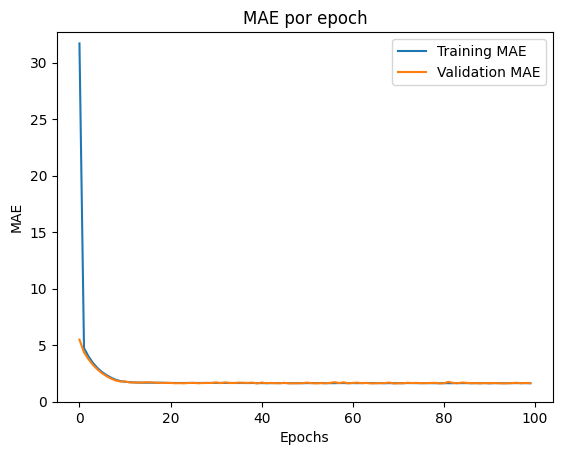

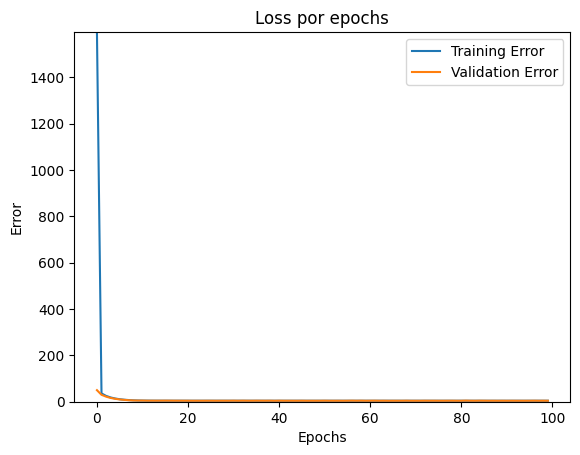

In [ ]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

# Mostramos la gráfica con la evolución de la mae obtenida para los datos de entrenamiento y la validación a lo largo de las épocas
plt.figure()

plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('MAE por epoch')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.ylim(0, max(max(history.history['mean_absolute_error']), max(history.history['val_mean_absolute_error'])) + 1)
plt.legend()

# Mostramos la gráfica con la evolución del error obtenido para los datos de entrenamiento y la validación a lo largo de los époch
plt.figure()
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.title('Loss por epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 1)
plt.legend()

plt.show()

In [12]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
#Usamos 100 epochs y un batch size de 32, ya que el modelo deberia estabilizar pronto debido a la cantidad de features, capas y datos disponibles.
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2940 - mean_absolute_error: 1.6431 - val_loss: 4.3720 - val_mean_absolute_error: 1.6660
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2735 - mean_absolute_error: 1.6401 - val_loss: 4.2432 - val_mean_absolute_error: 1.6444
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3052 - mean_absolute_error: 1.6439 - val_loss: 4.2987 - val_mean_absolute_error: 1.6471
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3289 - mean_absolute_error: 1.6455 - val_loss: 4.4222 - val_mean_absolute_error: 1.6838
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3272 - mean_absolute_error: 1.6537 - val_loss: 4.3784 - val_mean_absolute_error: 1.6708
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2686 - mean_absolute_error: 1.6364 - val_loss: 4.2388 - val_mean_absolute_error: 1.6373
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2593 - mean_absolute_error: 1.6342 - v

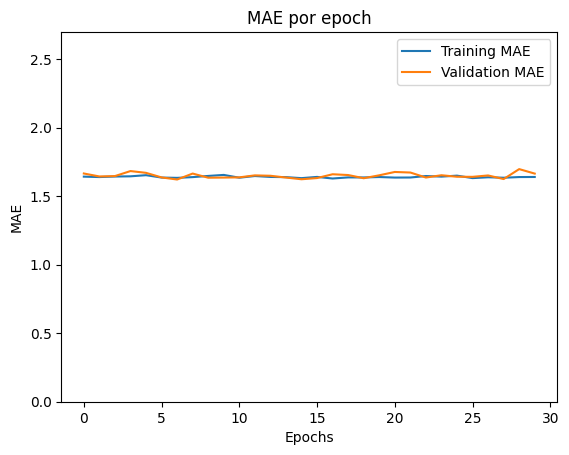

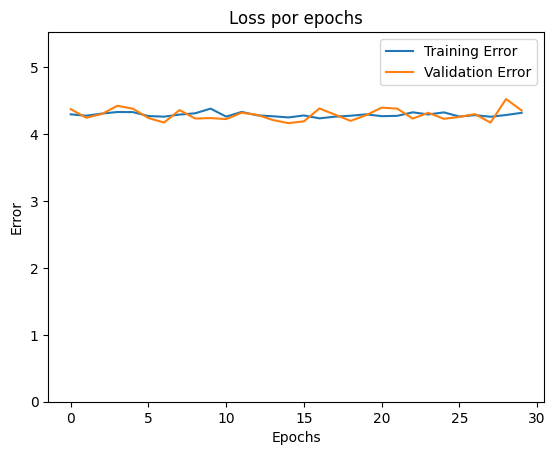

In [ ]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

# Mostramos la gráfica con la evolución de la  mae obtenida para los datos de entrenamiento y la validación a lo largo de las épocas
plt.figure()

plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('MAE por epoch')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.ylim(0, max(max(history.history['mean_absolute_error']), max(history.history['val_mean_absolute_error'])) + 1)
plt.legend()

# Mostramos la gráfica con la evolución del error obtenido para los datos de entrenamiento y la validación a lo largo de los époch
plt.figure()
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.title('Loss por epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 1)
plt.legend()

plt.show()

## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [ ]:
#Aplicaremos el algoritmo de ridge regression para comparar resultados
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mae = skl.metrics.mean_absolute_error(y_test, ridge_predictions)


Ridge Regression MAE on test set: 1.6112232281155408
Ridge Regression MSE on test set: 4.083211367310289


In [20]:
#Código para mostrar la evaluación de los modelos RIDGE REGRESSION

print("Ridge Regression MAE on test set:", ridge_mae)
print("Ridge Regression MSE on test set:", skl.metrics.mean_squared_error(y_test, ridge_predictions))

print("Red Neuronal MAE on test set:", model.evaluate(X_test, y_test, verbose=0)[1])
print("Red Neuronal MSE on test set:", model.evaluate(X_test, y_test, verbose=0)[0])   


Ridge Regression MAE on test set: 1.6112232281155408
Ridge Regression MSE on test set: 4.083211367310289
Red Neuronal MAE on test set: 1.6653003692626953
Red Neuronal MSE on test set: 4.352046012878418


Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

En cuanto a la red neuronal, encontramos que un modelo de red neuronal simple feedforward es suficiente para la complejidad y la presunta linearidad que el data set representa, encontramos segun los graficos de evaluacion de la red neuronal que rapidamente en los primeros epochs la red encuentra su optimo, y desde ahi el sistema permanece estable, no se acusa overfitting ya que los resultados en validacion tienden a los mismos valores de mean absolute error (MAE) y loss (MSE), adicionalmente se disminuyo el numero de epochs encontrando que la red se estabiliza rapidamente con muchos menos epochs.

Tambien encontramos que la regresion ridge explica de mejor manera los datos, sin que signifique que la red neuronal no es una buena herramienta para la prediccion, esto nos indica que la estructura del problema es principalmente lineal, asi como lo sospechamos desde un inicio.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [23]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

comparison_df = pd.DataFrame({
    "Model": ["Ridge Regression", "red neuronal"],
    "MAE": [
        ridge_mae,
        model.evaluate(X_test, y_test, verbose=0)[1]
    ],
    "MSE": [
        skl.metrics.mean_squared_error(y_test, ridge_predictions),
        model.evaluate(X_test, y_test, verbose=0)[0]
    ]
})
print(comparison_df)

              Model       MAE       MSE
0  Ridge Regression  1.611223  4.083211
1      red neuronal  1.665300  4.352046


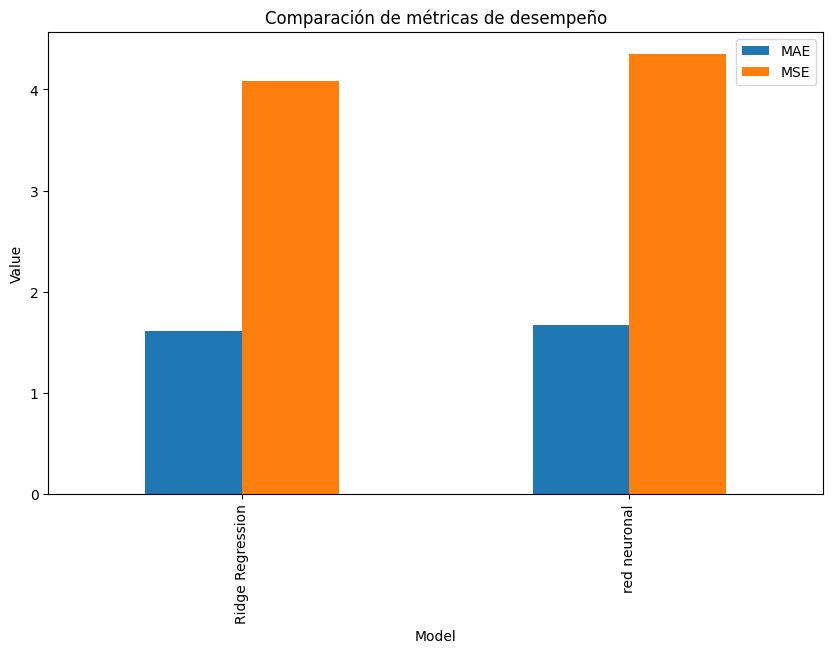

In [24]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

comparison_df.set_index("Model", inplace=True)
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de métricas de desempeño')
plt.ylabel('Value')
plt.show()

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 
   + El modelo contiene una alta linearidad, ya que explica que un estudiante que estudia mas, duerme mas, tiene mejor historial, participa en actividades extracurriculares y prepara mas los examenes obtendra una mejor califiacion, por ende las tecnicas utilizadas explican de excelente manera los datos dado su robustez en problemas de regresion lineal.
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
   + Se escoge la tecnica de regresion Ridge ya que esta modelo mejor las relaciones lineales cuidando en no sobreajustar los datos, adicionalmente indica que una red neuronal no es necesaria para el ejemplo ya que tiene una capacidad mayor a la necesaria para resolver el problema y no mejora el resultado con respecto a la regresion Ridge
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales:
  +  Independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.
    El resultado de la red neuronal no mejorara aumentando los epochs, la funcion de activacion de las capas intermedias se puede variar y con ello obtener un posible mejor resultado.